<a href="https://colab.research.google.com/github/Tanvir1080/ArtificalIntelligence-2019/blob/master/FashionFits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


## Displaying some MNIST fashion items

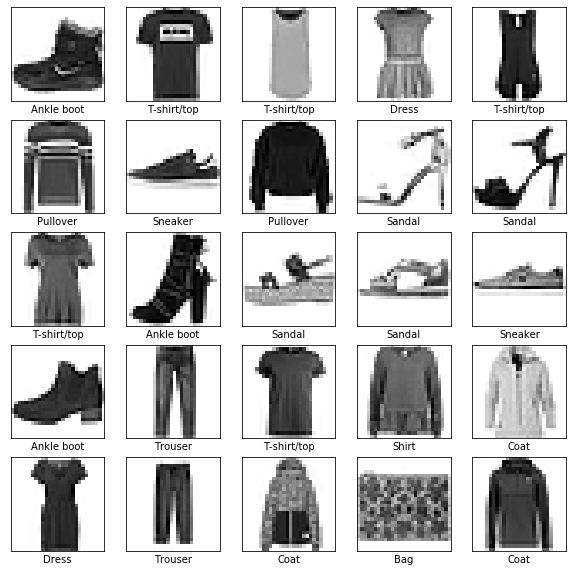

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

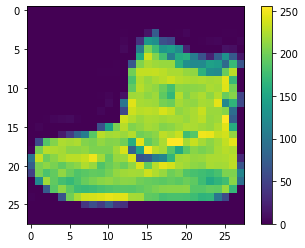

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Balanced Model

In [0]:
# set up the layers
# Balanced model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 217us/sample - loss: 0.6114 - acc: 0.7792 - val_loss: 0.4703 - val_acc: 0.8273
Epoch 2/20
60000/60000 [==============================] - 12s 200us/sample - loss: 0.4928 - acc: 0.8241 - val_loss: 0.4482 - val_acc: 0.8421
Epoch 3/20
60000/60000 [==============================] - 12s 200us/sample - loss: 0.4593 - acc: 0.8358 - val_loss: 0.4038 - val_acc: 0.8562
Epoch 4/20
60000/60000 [==============================] - 12s 200us/sample - loss: 0.4397 - acc: 0.8443 - val_loss: 0.4011 - val_acc: 0.8566
Epoch 5/20
60000/60000 [==============================] - 12s 200us/sample - loss: 0.4240 - acc: 0.8467 - val_loss: 0.3926 - val_acc: 0.8610
Epoch 6/20
60000/60000 [==============================] - 12s 200us/sample - loss: 0.4179 - acc: 0.8500 - val_loss: 0.3808 - val_acc: 0.8658
Epoch 7/20
60000/60000 

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 85us/sample - loss: 0.3581 - acc: 0.8744
Test accuracy: 0.8744


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

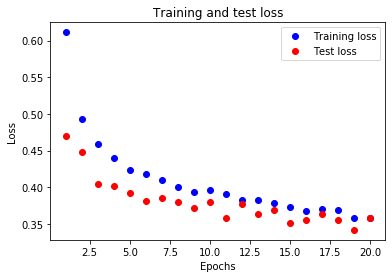

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

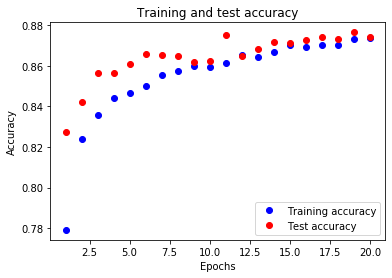

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Overfit Model


In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 195us/sample - loss: 0.4878 - acc: 0.8211 - val_loss: 0.4549 - val_acc: 0.8340
Epoch 2/20
60000/60000 [==============================] - 12s 193us/sample - loss: 0.3761 - acc: 0.8630 - val_loss: 0.4091 - val_acc: 0.8519
Epoch 3/20
60000/60000 [==============================] - 12s 192us/sample - loss: 0.3339 - acc: 0.8776 - val_loss: 0.3659 - val_acc: 0.8720
Epoch 4/20
60000/60000 [==============================] - 12s 193us/sample - loss: 0.3105 - acc: 0.8849 - val_loss: 0.3709 - val_acc: 0.8652
Epoch 5/20
60000/60000 [==============================] - 12s 192us/sample - loss: 0.2928 - acc: 0.8912 - val_loss: 0.3453 - val_acc: 0.8762
Epoch 6/20
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2763 - acc: 0.8959 - val_loss: 0.3269 - val_acc: 0.8821
Epoch 7/20
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2650 - acc: 0.9002 

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 85us/sample - loss: 0.4566 - acc: 0.8912
Test accuracy: 0.8912


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

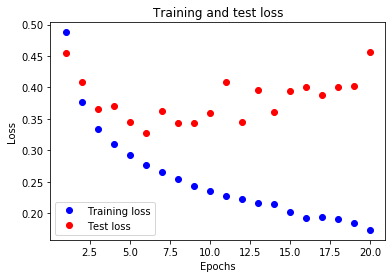

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

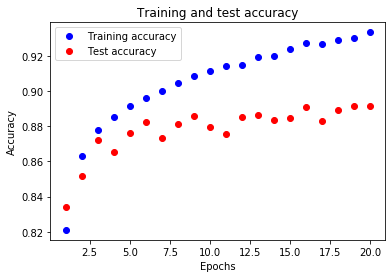

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Underfit Model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.relu)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/sample - loss: 2.3247 - acc: 0.1004 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
60000/60000 [==============================] - 6s 96us/sample - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/20
60000/60000 [==============================] - 5s 91us/sample - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/20
60000/60000 [==============================] - 5s 89us/sample - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/20
60000/60000 [==============================] - 5s 89us/sample - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/20
60000/60000 [==============================] - 5s 90us/sample - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/20
60000/60000

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 57us/sample - loss: 2.3026 - acc: 0.1000
Test accuracy: 0.1


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

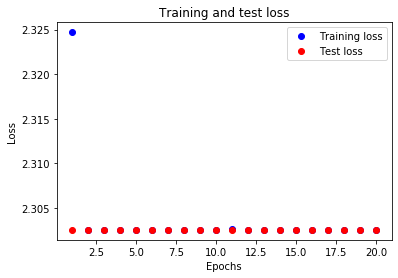

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

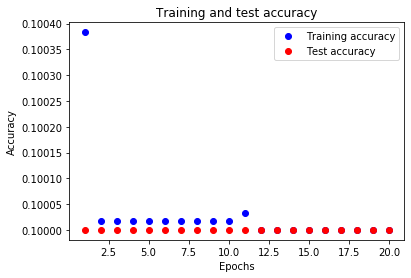

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()